## Resources

In [352]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

In [312]:
import functions as fn

# See functions.py to see how the data is cleaned

df = fn.import_and_clean_data('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age,bath_to_bed
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,52,0.250000
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,0.500000
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,0.333333
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,1.000000
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,1.000000


## EDA

In [313]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'age', 'bath_to_bed'],
      dtype='object')

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28959 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             28959 non-null  int64  
 1   date           28959 non-null  object 
 2   price          28959 non-null  float64
 3   bedrooms       28959 non-null  int64  
 4   bathrooms      28959 non-null  float64
 5   sqft_living    28959 non-null  int64  
 6   sqft_lot       28959 non-null  int64  
 7   floors         28959 non-null  float64
 8   waterfront     28959 non-null  object 
 9   greenbelt      28959 non-null  object 
 10  nuisance       28959 non-null  object 
 11  view           28959 non-null  object 
 12  condition      28959 non-null  int64  
 13  grade          28959 non-null  int64  
 14  heat_source    28959 non-null  object 
 15  sewer_system   28959 non-null  object 
 16  sqft_above     28959 non-null  int64  
 17  sqft_basement  28959 non-null  int64  
 18  sqft_g

In [315]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age,bath_to_bed
count,2.895900e+04,2.895900e+04,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000,28959.000000
mean,4.583861e+09,1.051138e+06,3.389344,2.289910,2037.981629,11570.077972,1.540108,3.473739,7.591630,1754.269346,452.054456,315.158431,198.305466,1974.763528,88.322180,47.321251,-121.290675,46.236472,0.691836
std,2.882613e+09,7.233138e+05,0.961320,0.828525,841.673375,20406.186603,0.569324,0.702963,1.068168,791.055170,535.663377,261.715858,204.128819,32.200530,410.739076,1.458032,5.823823,32.200530,0.226852
min,1.000055e+06,2.736000e+04,0.000000,0.000000,260.000000,402.000000,1.000000,1.000000,2.000000,260.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,-1.000000,0.000000
25%,2.126049e+09,6.400000e+05,3.000000,2.000000,1400.000000,4766.500000,1.000000,3.000000,7.000000,1170.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.404870,-122.327988,18.000000,0.500000
50%,3.901000e+09,8.500000e+05,3.000000,2.500000,1890.000000,7318.000000,1.500000,3.000000,7.000000,1530.000000,0.000000,380.000000,140.000000,1977.000000,0.000000,47.551060,-122.231760,44.000000,0.666667
75%,7.308000e+09,1.261000e+06,4.000000,2.500000,2540.000000,10092.500000,2.000000,4.000000,8.000000,2200.000000,920.000000,500.000000,300.000000,2003.000000,0.000000,47.670560,-122.120488,69.000000,0.833333
max,9.904000e+09,3.075000e+07,11.000000,7.500000,5140.000000,218226.000000,4.000000,5.000000,12.000000,5500.000000,2010.000000,1060.000000,1070.000000,2022.000000,2022.000000,64.824070,-70.074340,121.000000,4.500000


In [316]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
age              0
bath_to_bed      0
dtype: int64

In [317]:
print(df['sqft_living'].sort_values(ascending = False))

9948     5140
12350    5130
11219    5130
23258    5130
20717    5130
         ... 
11989     310
23622     290
8391      290
5811      290
8694      260
Name: sqft_living, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

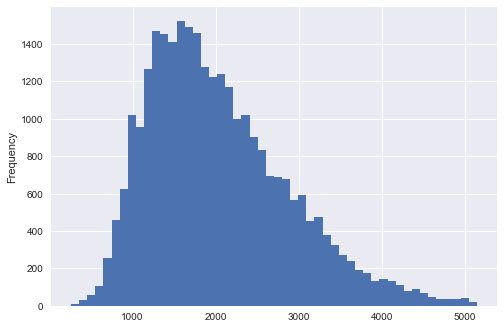

In [318]:
df['sqft_living'].plot(kind = 'hist', bins = 50)

In [319]:
print(df['sqft_lot'].sort_values(ascending = False))

329      218226
1997     218171
27403    217852
28172    217800
17782    217800
          ...  
1798        468
3070        435
12400       420
8788        412
16934       402
Name: sqft_lot, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

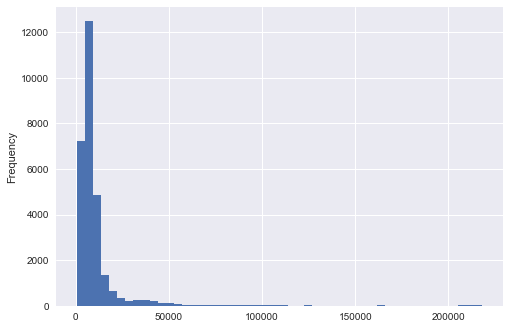

In [320]:
df['sqft_lot'].plot(kind = 'hist', bins = 50)

In [321]:
print(df['bedrooms'].sort_values(ascending = False))

9884     11
24101    10
11826     9
2536      9
2155      9
         ..
18639     0
17536     0
20643     0
1952      0
573       0
Name: bedrooms, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

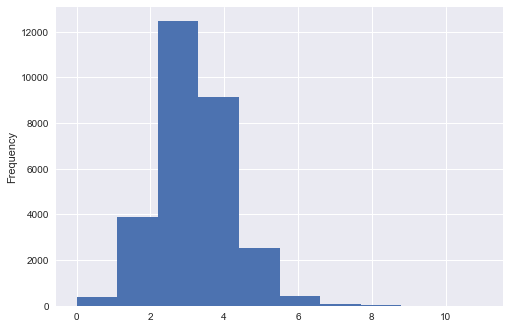

In [322]:
df['bedrooms'].plot(kind = 'hist', bins = 10)

In [323]:
print(df['bathrooms'].sort_values(ascending = False))

21623    7.5
657      7.5
1949     7.0
21296    7.0
24101    7.0
        ... 
25994    0.0
19920    0.0
28508    0.0
1289     0.0
7545     0.0
Name: bathrooms, Length: 28959, dtype: float64


<AxesSubplot:ylabel='Frequency'>

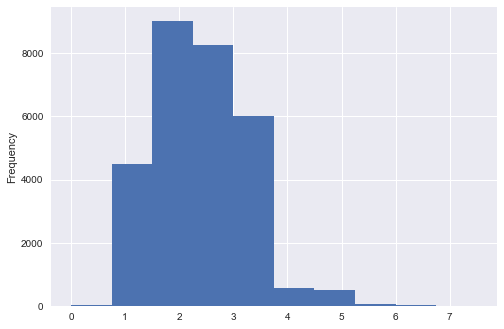

In [324]:
df['bathrooms'].plot(kind = 'hist', bins = 10)

In [325]:
print(df['condition'].sort_values(ascending = False))

21199    5
7311     5
7313     5
7314     5
7316     5
        ..
23335    1
7961     1
8468     1
11822    1
17155    1
Name: condition, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

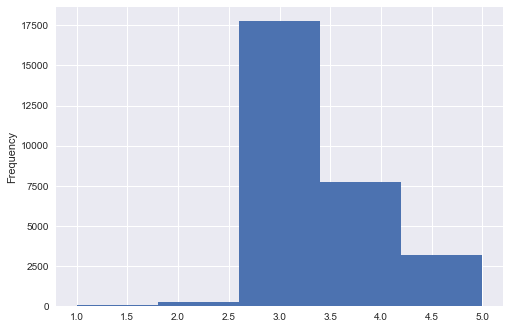

In [326]:
df['condition'].plot(kind = 'hist', bins = 5)

In [327]:
print(df['grade'].sort_values(ascending = False))

21009    12
25829    12
14339    12
4890     12
11249    12
         ..
14636     3
29732     3
8468      3
21804     3
30071     2
Name: grade, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

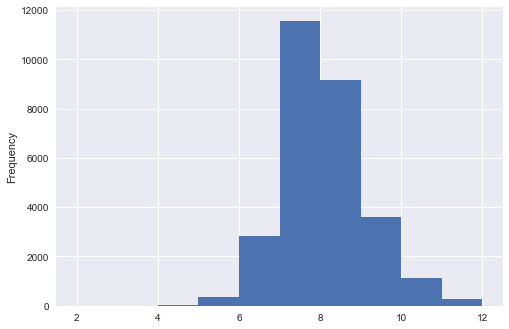

In [328]:
df['grade'].plot(kind = 'hist', bins = 10)

In [329]:
print(df['sqft_basement'].sort_values(ascending = False))

5984     2010
28487    2010
25748    2010
16320    2010
10786    2010
         ... 
16994       0
16998       0
17001       0
17005       0
0           0
Name: sqft_basement, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

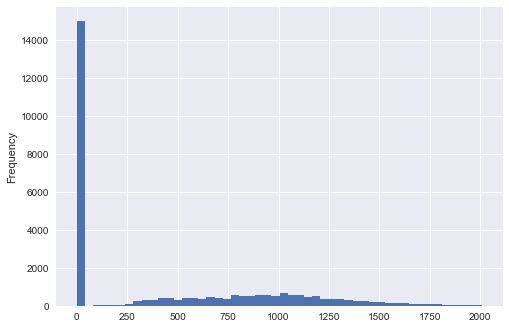

In [330]:
df['sqft_basement'].plot(kind = 'hist', bins = 50)

In [331]:
print(df['sqft_patio'].sort_values(ascending = False))

27705    1070
29993    1070
28847    1070
2416     1070
1997     1070
         ... 
15935       0
15932       0
15931       0
5156        0
30154       0
Name: sqft_patio, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

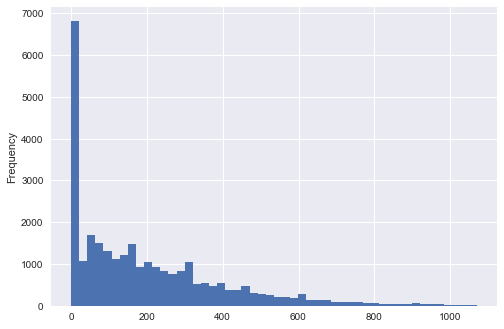

In [332]:
df['sqft_patio'].plot(kind = 'hist', bins = 50)

In [333]:
print(df['sqft_garage'].sort_values(ascending = False))

24076    1060
17435    1060
16836    1060
21272    1060
5076     1060
         ... 
9895        0
22463       0
22468       0
9886        0
0           0
Name: sqft_garage, Length: 28959, dtype: int64


<AxesSubplot:ylabel='Frequency'>

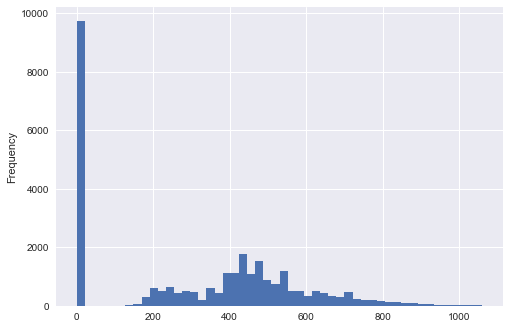

In [334]:
df['sqft_garage'].plot(kind = 'hist', bins = 50)

## Model Exploration

In [335]:

df = df.drop(['id', 'date', 'sqft_lot', 'sqft_above', 'floors', 'yr_built', 'yr_renovated', 'lat', 'long', 'waterfront', 'greenbelt', 'nuisance', 'view', 'heat_source', 'sewer_system', 'address', 'age'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed
0,675000.0,4,1.0,1180,4,7,0,0,40,0.250000
1,920000.0,5,2.5,2770,3,7,1570,0,240,0.500000
2,311000.0,6,2.0,2880,3,7,1580,0,0,0.333333
3,775000.0,3,3.0,2160,3,9,1070,200,270,1.000000
4,592500.0,2,2.0,1120,3,7,550,550,30,1.000000


In [336]:

df.corr()

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed
price,1.000000,0.274420,0.424641,0.549661,0.005911,0.535920,0.166171,0.209692,0.248313,0.213328
bedrooms,0.274420,1.000000,0.575249,0.654764,0.037385,0.347576,0.207413,0.314296,0.157328,-0.255431
bathrooms,0.424641,0.575249,1.000000,0.746044,-0.062272,0.611656,0.194644,0.433329,0.284709,0.589956
sqft_living,0.549661,0.654764,0.746044,1.000000,-0.049740,0.684679,0.251806,0.483416,0.330498,0.219746
condition,0.005911,0.037385,-0.062272,-0.049740,1.000000,-0.159886,0.105612,-0.061595,0.049695,-0.113734
grade,0.535920,0.347576,0.611656,0.684679,-0.159886,1.000000,0.060503,0.469263,0.308344,0.362755
sqft_basement,0.166171,0.207413,0.194644,0.251806,0.105612,0.060503,1.000000,-0.044755,0.163877,0.040996
sqft_garage,0.209692,0.314296,0.433329,0.483416,-0.061595,0.469263,-0.044755,1.000000,0.152641,0.169806
sqft_patio,0.248313,0.157328,0.284709,0.330498,0.049695,0.308344,0.163877,0.152641,1.000000,0.178565
bath_to_bed,0.213328,-0.255431,0.589956,0.219746,-0.113734,0.362755,0.040996,0.169806,0.178565,1.000000


<AxesSubplot:>

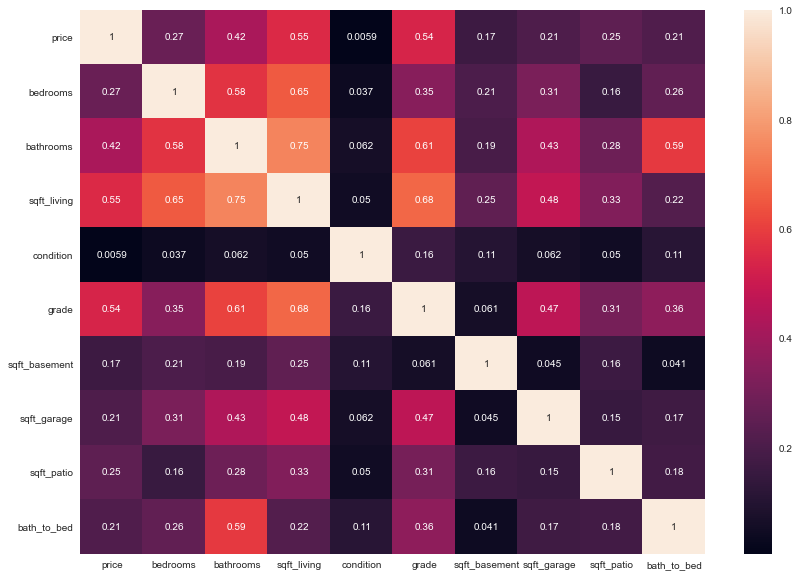

In [337]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(df.corr().abs(), annot=True)

In [338]:
formula = "price ~ sqft_living"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                 1.254e+04
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:28:08   Log-Likelihood:            -4.2659e+05
No. Observations:               28959   AIC:                         8.532e+05
Df Residuals:                   28957   BIC:                         8.532e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.847e+04   9302.321      9.510      0.000    7.02e+04    1.07e+05
sqft_living   472.3651      4.219    111.965      0.000     464.096     480.634
==============================================================================
Omnibus:                    42504.043   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         79500306.264
Skew:                           8.297   Prob(JB):                         0.00
Kurtosis:                     259.147   Cond. No.                     5.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [339]:
formula = "price ~ sqft_living + grade + sqft_patio"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     5245.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:28:08   Log-Likelihood:            -4.2551e+05
No. Observations:               28959   AIC:                         8.510e+05
Df Residuals:                   28955   BIC:                         8.511e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.072e+06   2.72e+04    -39.401      0.000   -1.13e+06   -1.02e+06
sqft_living   286.3708      5.662     50.576      0.000     275.273     297.469
grade        1.984e+05   4426.549     44.824      0.000     1.9e+05    2.07e+05
sqft_patio    169.4844     17.888      9.475      0.000     134.424     204.545
==============================================================================
Omnibus:                    43468.586   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         88703456.344
Skew:                           8.674   Prob(JB):                         0.00
Kurtosis:                     273.579   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [340]:
dflog = df.copy()


In [341]:
# dflog['bathbed'] = dflog['bathrooms'] / dflog['bedrooms']
# median_bathbed = dflog['bathbed'].median()
# dflog.replace([np.inf, -np.inf], median_bathbed, inplace=True)
# dflog.fillna(median_bathbed, inplace=True)
# dflog['bathbed'].value_counts()

In [342]:
#list for cols to scale
cols_to_scale = ['sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(dflog[cols_to_scale])

#scale selected data
dflog[cols_to_scale] = scaler.transform(dflog[cols_to_scale])
dflog


,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_basement,sqft_garage,sqft_patio,bath_to_bed
0,675000.0,4,1.0,-1.019394,4,7,-0.843930,-1.204222,-0.775531,0.250000
1,920000.0,5,2.5,0.869733,3,7,2.087066,-1.204222,0.204260,0.500000
2,311000.0,6,2.0,1.000427,3,7,2.105735,-1.204222,-0.971489,0.333333
3,775000.0,3,3.0,0.144974,3,9,1.153628,-0.440021,0.351228,1.000000
4,592500.0,2,2.0,-1.090681,3,7,0.182852,0.897331,-0.824520,1.000000
...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,-0.152059,4,8,1.265640,-1.204222,0.057291,0.400000
30151,1313000.0,3,2.0,-0.021365,3,7,-0.843930,-1.204222,1.575966,0.666667
30152,800000.0,3,2.0,-0.496616,3,7,0.873596,-0.287181,-0.432604,0.666667
30153,775000.0,3,2.5,0.632107,3,8,0.537559,0.629860,-0.481594,0.833333


## Good

In [343]:
target = dflog['price']
predictors = dflog.drop(['price'], axis=1)
# predictors = dflog.drop(['price', 'condition', 'bedrooms', 'bathrooms', 'sqft_garage', 'sqft_basement'], axis=1)
predictors = sm.add_constant(predictors)
model = sm.OLS(target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     1941.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:28:08   Log-Likelihood:            -4.2496e+05
No. Observations:               28959   AIC:                         8.499e+05
Df Residuals:                   28949   BIC:                         8.500e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.906e+05   5.37e+04    -10.996      0.000   -6.96e+05   -4.85e+05
bedrooms      -9.834e+04   9940.848     -9.892      0.000   -1.18e+05   -7.89e+04
bathrooms      3.285e+04   1.46e+04      2.247      0.025    4200.260    6.15e+04
sqft_living    3.094e+05   6597.580     46.897      0.000    2.96e+05    3.22e+05
condition      7.275e+04   4911.574     14.812      0.000    6.31e+04    8.24e+04
grade          2.274e+05   4734.200     48.042      0.000    2.18e+05    2.37e+05
sqft_basement  3.031e+04   3608.361      8.400      0.000    2.32e+04    3.74e+04
sqft_garage   -8.813e+04   4014.221    -21.954      0.000    -9.6e+04   -8.03e+04
sqft_patio     2.016e+04   3632.802      5.550      0.000     1.3e+04    2.73e+04
bath_to_bed    -1.15e+05   4.26e+04     -2.699      0.007   -1.98e+05   -3.15e+04
==============================================================================
Omnibus:                    44077.992   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         98855813.817
Skew:                           8.902   Prob(JB):                         0.00
Kurtosis:                     288.676   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
target = dflog['price']
predictors = dflog.drop(['price', 'bedrooms', 'bathrooms', 'sqft_garage'], axis=1)
# predictors = dflog.drop(['price', 'condition', 'bedrooms', 'bathrooms', 'sqft_garage', 'sqft_basement'], axis=1)
predictors = sm.add_constant(predictors)
model = sm.OLS(target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     2721.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:28:08   Log-Likelihood:            -4.2532e+05
No. Observations:               28959   AIC:                         8.507e+05
Df Residuals:                   28952   BIC:                         8.507e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.542e+05   4.11e+04    -20.763      0.000   -9.35e+05   -7.74e+05
sqft_living    2.233e+05   4929.540     45.305      0.000    2.14e+05    2.33e+05
condition      6.897e+04   4967.853     13.883      0.000    5.92e+04    7.87e+04
grade            2.1e+05   4709.171     44.585      0.000    2.01e+05    2.19e+05
sqft_basement  4.047e+04   3594.705     11.257      0.000    3.34e+04    4.75e+04
sqft_patio      2.34e+04   3675.743      6.365      0.000    1.62e+04    3.06e+04
bath_to_bed    1.038e+05   1.62e+04      6.410      0.000    7.21e+04    1.36e+05
==============================================================================
Omnibus:                    43559.571   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         88183939.757
Skew:                           8.717   Prob(JB):                         0.00
Kurtosis:                     272.776   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [345]:
lr = LinearRegression()
lr.fit(predictors, target)
lr.score(predictors, target)

0.3605565156167412

In [346]:
y_hat = lr.predict(predictors)
y_hat

array([ 637393.12011703, 1157809.2006115 , 1142944.62612833, ...,
        805951.93323451, 1270549.16172626,  595095.21419283])

In [347]:
y_hat = lr.predict(predictors)
resid = (target - y_hat)

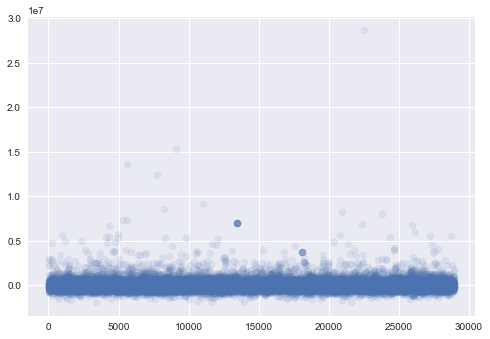

In [348]:
fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

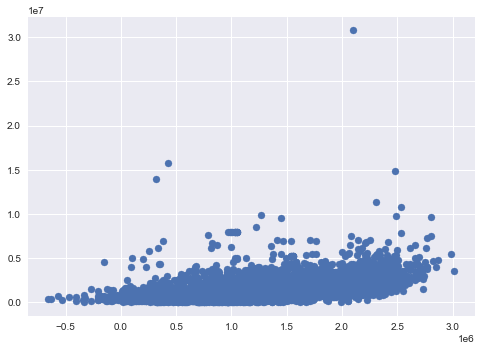

In [349]:
fig, ax = plt.subplots()

ax.scatter(y_hat, target)

In [353]:
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))

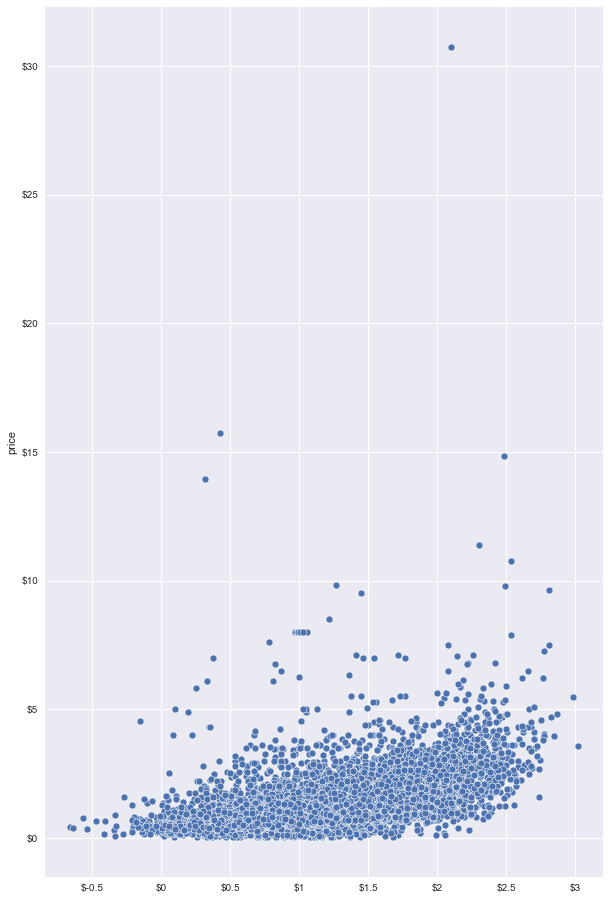

In [354]:
fig, ax = plt.subplots(figsize = (10,16))
sns.scatterplot(x = y_hat, y = target, ax=ax)
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)

<AxesSubplot:ylabel='price'>

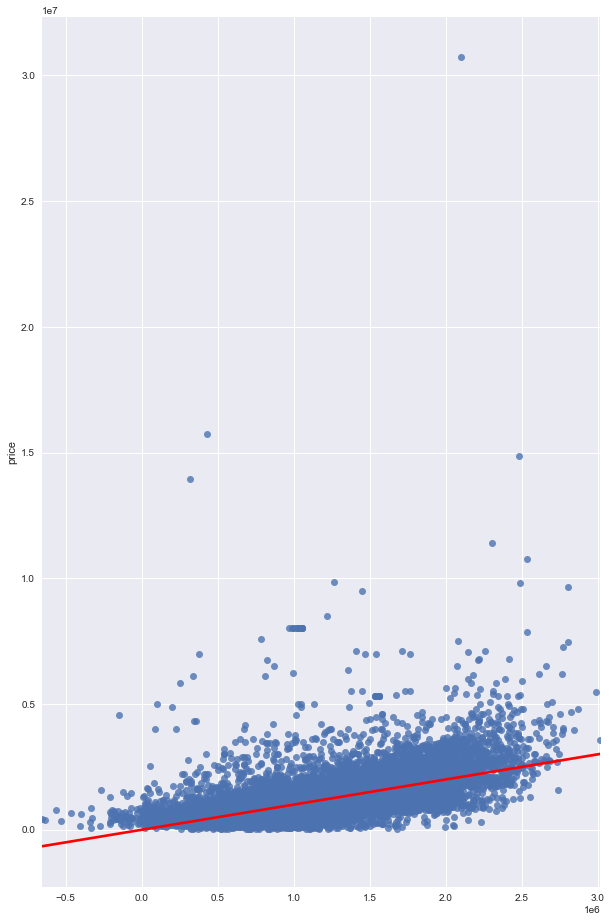

In [359]:
fig, ax = plt.subplots(figsize = (10,16))
sns.regplot(x = y_hat, y = target, line_kws={"color": "red"})